<h1 style="background-color:#ff5200;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>



[1. Libraries And Utilities](#1)

[2 Preprocessing](#2)

[3 Shapiro Wilk Test For Normality](#3)


[4. Variance Test](#4)

- [4.1 Bartlett's Test](#4.1)
-[4.2 Levene's Test](#4.2)
    
[5.1 Student's t-Test](#5.1)

[5.2 Kruskal Wallis Test](#5.2)

[6. Visualization](#6)


<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>


In [4]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [5]:
df0 = pd.read_csv('D:\GitHub\\4BIT\metabolites\dataset\serum_processed.csv')
df0 = df0.drop('Unnamed: 0', axis=1)
df0.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,...,29820,30132,200,333019,20281,62,159853,188,1226,disease


In [6]:
labels = np.reshape(df0.Class.to_numpy(), (82,1))
# labels

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Preprocessing</h1>


In [7]:
scl = StandardScaler().fit(df0.iloc[:, :-1])
stand = scl.transform(df0.iloc[:, :-1])
# stand
df = pd.DataFrame(stand, columns = df0.columns[:-1])
df = pd.concat([df, df0.iloc[:, -1]], axis=1)
df

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.259794,-0.138838,-0.621626,-0.622613,0.295096,-0.931814,0.859699,-0.801984,-0.470732,-0.170024,...,0.707152,1.990466,-0.509527,0.322589,-0.944967,-0.196688,1.542466,-0.351356,0.002295,disease
1,0.828579,-0.170872,-0.724447,-0.417612,-0.583565,0.355070,-0.864481,-0.027166,-0.372528,0.027454,...,-1.325690,0.178488,-0.025493,-1.355050,-1.170035,-0.086721,-0.218158,-0.045440,0.244268,disease
2,-0.821306,-0.170600,-1.367077,0.019131,-0.965089,-0.581706,1.132517,0.876789,-0.193450,0.101060,...,-0.017602,-0.751187,-0.001291,-0.589292,-0.149613,1.819363,-0.839934,-0.170865,-0.014814,disease
3,-0.048288,1.596447,-0.338869,-0.471090,0.167921,0.042811,1.754546,2.200437,-0.314761,-1.358484,...,-1.820009,-0.838402,-0.424821,-0.123994,-0.372299,0.389800,-0.810940,-0.464545,-0.009926,disease
4,-0.597455,-0.185260,-0.210344,-0.551308,-0.323435,-0.950738,0.063487,-0.737416,-0.511169,0.285971,...,0.072705,-0.602167,-0.034569,1.699124,0.431944,-0.416621,1.787648,-0.369711,1.016627,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.432585,-0.185260,-0.004702,-0.881093,-1.034457,-0.335684,0.723955,-0.850411,-0.060585,0.490631,...,0.747639,0.008344,-0.361291,0.788893,0.190052,-0.709864,-0.326089,-0.394184,-0.151688,control
78,0.251662,-0.192047,0.869274,1.160008,-0.803231,-0.373533,-0.657057,-0.656706,-0.430295,0.623480,...,-0.172516,-0.823657,-0.324989,1.402881,1.360942,-0.856486,0.751055,-0.299350,-0.388773,control
79,0.428249,-0.101102,-0.415985,1.570011,-0.126893,-1.139986,-0.730550,0.295675,-0.043255,-0.114371,...,1.475551,0.146070,-0.137426,1.220747,0.662408,-0.160032,-1.369256,0.453203,-0.149244,control
80,-0.954641,-0.184717,-0.056113,-0.667179,0.208386,-0.326221,-0.316428,-0.947263,0.089610,-0.245425,...,-0.005829,-1.270403,5.117364,0.966139,-0.045174,-0.196688,-0.128889,2.897473,-0.694294,control


<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Shapiro Wilk Test for Normality</h1>

In [8]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [9]:
def shapiro_wilk(feature):
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    return feature, disease_shapiro[1], control_shapiro[1] # [1] for p-value, [0] for test statistics

In [10]:
shapiro_wilk_result = []
for i in range(1, 158):
    shapiro_wilk_result.append(shapiro_wilk(df.columns[i]))
shapiro_wilk_result_df = pd.DataFrame(shapiro_wilk_result, columns = ['Features', 'Disease', 'Control'])
shapiro_wilk_result_df = shapiro_wilk_result_df[(shapiro_wilk_result_df.Disease>0.05) & (shapiro_wilk_result_df.Control>0.05)]
normal = shapiro_wilk_result_df.Features.to_numpy()
normal

array(['2-ketoisocaproic acid', '3-phosphoglycerate', 'alanine',
       'asparagine', 'capric acid', 'cholesterol', 'cysteine-glycine',
       'glycolic acid', 'heptadecanoic acid', 'leucine', 'lysine',
       'ornithine', 'phosphate', 'proline', 'taurine', 'threonine',
       'tryptophan', 'urea', 'uric acid', 'valine'], dtype=object)

So we can see that, only 19 features has p value > 0.05(normally distributed), which declines the proof of 100% normality of our dataset. Now we proceed to <b>Levene Test</b> for testing Equality of Variance. If dataset was 100% normally distributed, we would use <b>Bartlett’s Test</b>.

In [11]:
non_normal = [i for i in df.columns if i not in normal and i!='Class']
len(non_normal)

138

<a id="4"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Variance Test</h1>


<a id="4.1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Bartlett's Test</h1>


In [12]:
def bartlett_test(feature):
    b_test = stats.bartlett(disease[feature], control[feature])
    return feature, b_test[0], b_test[1] # [1] for p-value, [0] for test statistics

In [13]:
bartlett_result = []
for i in normal:
    bartlett_result.append(bartlett_test(i))
bartlett_result_df = pd.DataFrame(bartlett_result, columns = ['Features', 'test', 'p-Value'])
bartlett_result_df

,Features,test,p-Value
0,2-ketoisocaproic acid,0.592603,0.441414
1,3-phosphoglycerate,0.417368,0.518253
2,alanine,1.689940,0.193609
3,asparagine,4.307178,0.037952
4,capric acid,0.591668,0.441775
5,cholesterol,0.221792,0.637678
6,cysteine-glycine,0.787831,0.374757
7,glycolic acid,1.736831,0.187541
8,heptadecanoic acid,0.028772,0.865307
9,leucine,3.527791,0.060348


In [14]:
parametric = [bartlett_result_df.loc[i, 'Features']\
                    for i in range(len(bartlett_result)) if bartlett_result_df.loc[i, 'p-Value'] > 0.05]
parametric

['2-ketoisocaproic acid',
 '3-phosphoglycerate',
 'alanine',
 'capric acid',
 'cholesterol',
 'cysteine-glycine',
 'glycolic acid',
 'heptadecanoic acid',
 'leucine',
 'lysine',
 'ornithine',
 'phosphate',
 'threonine',
 'tryptophan',
 'urea',
 'uric acid',
 'valine']

<a id="4.2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Levene's Test</h1>


In [15]:
def levene_test(feature):
    l_test = stats.levene(disease[feature], control[feature])
    return feature, l_test[0], l_test[1] # [1] for p-value, [0] for test statistics

In [16]:
levene_result = []
for i in non_normal:
    levene_result.append(levene_test(i))
levene_result_df = pd.DataFrame(levene_result, columns = ['Features', 'test', 'p-Value'])
levene_result_df

,Features,test,p-Value
0,1_5-anhydroglucitol,0.081682,0.775770
1,1-monostearin,0.216985,0.642612
2,2_3-dihydroxybutanoic acid NIST,2.102874,0.150932
3,2_4-diaminobutyric acid,2.005343,0.160628
4,2-deoxyerythritol,1.170391,0.282571
...,...,...,...
133,tyrosine,0.303348,0.583326
134,UDP-glucuronic acid,1.322884,0.253502
135,uridine,0.053945,0.816929
136,xylitol,2.078090,0.153330


In [17]:
parametric += [levene_result_df.loc[i, 'Features']\
                    for i in range(len(levene_result)) if levene_result_df.loc[i, 'p-Value'] > 0.05]
len(parametric)

141

In [18]:
non_parametric = [i for i in df.columns if i not in parametric and i!='Class']
len(non_parametric)

17

So, we got:
- Parametric features: 141 which needs Student's t-Test
- NonParametric: 17 which needs Kruskal Wallis t-Test

<a id="5.1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Student's t-Test</h1>


In [19]:
t_result = []
for i in parametric:
    t_test = stats.ttest_ind(disease[i], control[i])
    t_result.append([i, t_test[0], t_test[1]])
t_result_df = pd.DataFrame(t_result, columns = ['Features', 'test', 'p-Value'])
t_result_df

,Features,test,p-Value
0,2-ketoisocaproic acid,-0.824341,0.412197
1,3-phosphoglycerate,0.014583,0.988401
2,alanine,-0.459671,0.646999
3,capric acid,0.230067,0.818627
4,cholesterol,-2.898699,0.004834
...,...,...,...
136,tyrosine,-0.398112,0.691608
137,UDP-glucuronic acid,-0.968844,0.335543
138,uridine,0.649421,0.517926
139,xylitol,-1.184823,0.239595


<a id="5.2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Kruskal Wallis Test</h1>


In [20]:
k_result = []
for i in non_parametric:
    k_test= stats.kruskal(disease[i], control[i])
    k_result.append([i, k_test[0], k_test[1]])
k_result_df = pd.DataFrame(k_result, columns = ['Features', 'test', 'p-Value'])
k_result_df

,Features,test,p-Value
0,2-deoxytetronic acid,3.187560,0.074201
1,asparagine,0.464648,0.495460
2,aspartic acid,22.502780,0.000002
3,beta-alanine,3.475236,0.062294
4,citric acid,0.868695,0.351317
5,conduritol-beta-epoxide,0.223759,0.636191
6,deoxypentitol,9.113589,0.002537
7,glutamic acid,7.561097,0.005964
8,glycine,0.439691,0.507272
9,hexitol,4.851403,0.027624


In [21]:
result_df = pd.concat([t_result_df, k_result_df], axis=0, ignore_index=True)
result_df

,Features,test,p-Value
0,2-ketoisocaproic acid,-0.824341,0.412197
1,3-phosphoglycerate,0.014583,0.988401
2,alanine,-0.459671,0.646999
3,capric acid,0.230067,0.818627
4,cholesterol,-2.898699,0.004834
...,...,...,...
153,malic acid,7.284772,0.006954
154,phenol,13.182680,0.000283
155,proline,0.264924,0.606757
156,propane-1_3-diol NIST,1.746543,0.186312


In [22]:
metabolics = result_df[(result_df['p-Value'] < 0.02)].loc[:, 'Features']
metabolics = metabolics.to_numpy()
len(metabolics)
# metabolics

16

In [23]:
metabolites = result_df[(result_df['p-Value'] < 0.015)]
metabolites.to_latex('output2.tex')

In [24]:
r_metabolites = result_df[(result_df['p-Value'] >= 0.015)]
r_metabolites.to_latex('output_removed2.tex')
r_metabolites.to_csv('output_removed2.csv', index=False)

Now we keep the data of these metabolics only, from main dataset.

In [25]:
final_df = df.loc[:, metabolics]
final_df = pd.concat([final_df, df.loc[:, 'Class']], axis=1)
final_df

,cholesterol,threonine,uric acid,3-hydroxybutanoic acid,5-hydroxynorvaline NIST,inosine,lactic acid,N-methylalanine,phenylalanine,quinic acid,aspartic acid,deoxypentitol,glutamic acid,malic acid,phenol,taurine,Class
0,0.123632,-0.680530,-0.944967,2.303685,-0.884310,-0.571647,0.094923,-0.186546,-0.343844,-0.659995,-0.413389,-1.267860,-0.211881,0.470533,-0.121362,0.005331,disease
1,1.163621,-0.694738,-1.170035,-1.570529,-1.054991,-0.283131,0.676247,-1.136707,0.299430,-0.848747,0.176392,0.007955,-0.477977,-0.318708,0.446950,0.857427,disease
2,1.335657,-1.220181,-0.149613,0.890281,-0.569205,-0.518654,1.634194,-0.719219,-0.855227,-0.337289,-0.141775,0.573702,0.751584,-0.127763,1.341798,0.035604,disease
3,1.049709,-0.648133,-0.372299,-0.847462,-0.536382,-0.606976,0.264560,1.632207,-0.053586,-0.798819,0.282325,-0.038228,-0.312322,0.063183,0.251028,0.783080,disease
4,-0.756814,0.073959,0.431944,1.669885,1.236080,-0.601088,-0.827738,0.855814,-0.041329,2.058040,-0.557444,-0.615520,-0.803098,0.126831,-1.471972,-0.745261,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.441813,0.274019,0.190052,0.580820,-0.411653,0.229133,-0.907398,0.526569,-0.124189,-0.188723,-0.613526,0.464016,0.207017,-0.267790,-0.764708,-1.015491,control
78,-1.019159,0.620430,1.360942,-0.112492,0.061003,4.863057,0.247532,0.626430,-0.229359,-0.782988,0.184822,0.198462,0.010182,0.317777,0.087065,-0.488831,control
79,-0.202846,-0.853877,0.662408,-0.133321,-0.155631,0.411663,-0.612624,-0.830203,0.067763,0.390930,-0.677673,-0.240280,-0.639585,0.114102,-0.474300,-0.785773,control
80,-0.456752,0.749162,-0.045174,-0.951607,-0.634852,-0.665857,-0.257315,1.011784,-0.853511,-0.797601,-0.424019,-0.471197,-0.492257,-0.496924,-1.722085,-0.368184,control


In [26]:
final_df.to_csv('serum(Specific Metabolics)_final2.csv')

<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Visualization</h1>


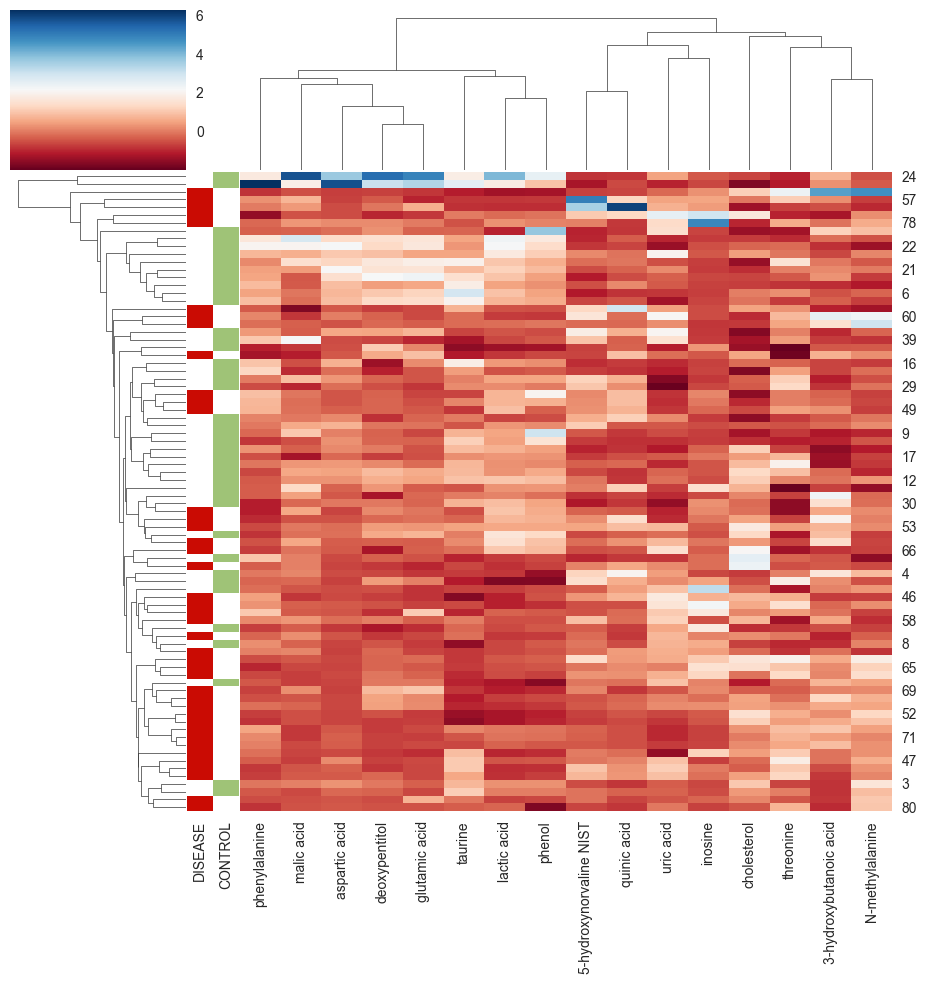

In [27]:
# Data set
final_df1 = final_df.copy()
Class = final_df.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(final_df, cmap='RdBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
plt.savefig('clustermap_serum_final.JPG')
plt.show()

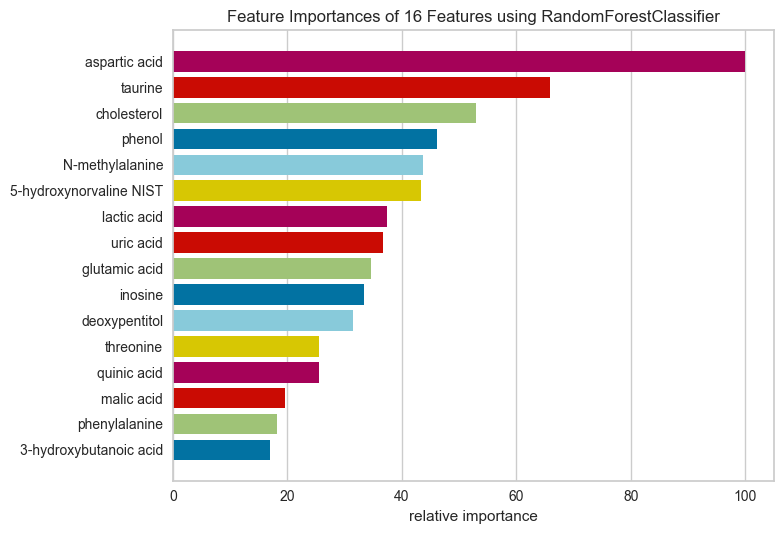

<Axes: title={'center': 'Feature Importances of 16 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [28]:
# Load the classification data set
X = final_df1.drop('Class', axis=1)
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=29)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()